In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 2

In [2]:
np.random.seed(16)
# generate hyperplane
w = np.random.rand(2,1)
b = np.random.rand()
print(w, b)

[[ 0.22329108]
 [ 0.52316334]] 0.5507014565811811


In [3]:
# generate data
x = []
y = []
while True:
    tmp = np.random.rand(2,1)*20 - 10
    if w.T@tmp + b > 0:
        x.append(tmp)
        y.append(-1)
    if len(x) == 10:
        break
while True:
    tmp = np.random.rand(2,1)*20 - 10
    if w.T@tmp + b < 0:
        x.append(tmp)
        y.append(1)
    if len(x) == 20:
        break
x = np.rollaxis(np.array(x).squeeze(), 1, 0)
y = np.array(y)

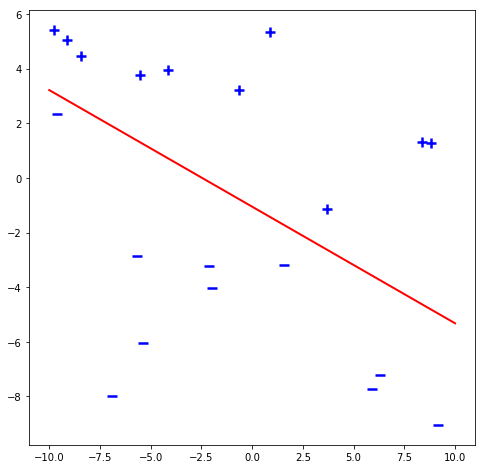

In [4]:
plt.figure(figsize=(8,8))
plt.plot(x[0, :10], x[1, :10], 'b+', mew=2.5, markersize=10)
plt.plot(x[0, 10:], x[1, 10:], 'b_', mew=2.5, markersize=10)
# plt.plot([0,1], [-b/w[1], (-b-w[0])/w[1]])
# w[0]x1 + w[1]x2 + b = 0
plt.plot([-10,10], [(-b+10*w[0])/w[1], (-b-10*w[0])/w[1]], 'r', linewidth=2)
# plt.plot(1, )
plt.show()

In [5]:
from quadprog import solve_qp

In [6]:
print(solve_qp.__doc__)

Solve a strictly convex quadratic program

    Minimize     1/2 x^T G x - a^T x
    Subject to   C.T x >= b

    This routine uses the the Goldfarb/Idnani dual algorithm [1].

    References
    ---------
    ... [1] D. Goldfarb and A. Idnani (1983). A numerically stable dual
        method for solving strictly convex quadratic programs.
        Mathematical Programming, 27, 1-33.

    Parameters
    ----------
    G : array, shape=(n, n)
        matrix appearing in the quadratic function to be minimized
    a : array, shape=(n,)
        vector appearing in the quadratic function to be minimized
    C : array, shape=(n, m)
        matrix defining the constraints under which we want to minimize the
        quadratic function
    b : array, shape=(m), default=None
        vector defining the constraints
    meq : int, default=0
        the first meq constraints are treated as equality constraints,
        all further as inequality constraints (defaults to 0).
    factorized : bool, defau

In [7]:
n, p = x.shape
print(x.shape)

(2, 20)


In [8]:
H = np.eye(n)
H = np.hstack((H, np.zeros((n, 1))))
H = np.vstack((H, np.zeros((1, n+1))))
print(H)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


In [11]:
A = np.hstack(((x*y[None, :]).T, y.reshape((p,1)))).T
b = np.ones((p))

In [12]:
A.shape

(3, 20)

In [41]:
np.linalg.eig(H)

(array([ 1.,  1.,  0.]), array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]))

In [13]:
res = solve_qp(H, np.zeros((n+1)), -A, b)

ValueError: matrix G is not positive definite

In [14]:
import scipy.optimize
def solve_qp_scipy(G, a, C, b, meq=0):
    # Minimize     1/2 x^T G x - a^T x
    # Subject to   C.T x >= b
    def f(x):
        return 0.5 * np.dot(x.T, G).dot(x) - np.dot(a, x)

    if C is not None and b is not None:
        constraints = [{
            'type': 'ineq',
            'fun': lambda x, C=C, b=b, i=i: (np.dot(C.T, x) - b)[i]
        } for i in range(C.shape[1])]
    else:
        constraints = []

    result = scipy.optimize.minimize(f, x0=np.zeros(len(G)), method='COBYLA',
        constraints=constraints, tol=1e-10)
    return result

In [15]:
solve_qp_scipy(H, np.zeros((n+1)), -A, b)

     fun: 0.0
   maxcv: 1.0
 message: 'Did not converge to a solution satisfying the constraints. See `maxcv` for magnitude of violation.'
    nfev: 44
  status: 4
 success: False
       x: array([ 0.,  0.,  0.])

# Problem 3

In [5]:
from scipy.optimize import linprog

In [6]:
n, p = x.shape
print(x.shape)

(2, 20)


In [7]:
y.shape

(20,)

In [8]:
# a1 = np.hstack((np.eye(n), np.zeros((n, 1)), np.zeros((n, p)), -np.eye(n)))
a1 = np.hstack((np.eye(n), np.zeros((n, 1)), -np.eye(n)))

In [9]:
# a2 = np.hstack((-np.eye(n), np.zeros((n, 1)), np.zeros((n, p)), -np.eye(n)))
a2 = np.hstack((-np.eye(n), np.zeros((n, 1)), -np.eye(n)))

In [10]:
# a3 = np.hstack(((x*y[None, :]).T, y.reshape((p,1)), -np.eye(p), np.zeros((p,n))))
a3 = np.hstack(((x*y[None, :]).T, y.reshape((p,1)), np.zeros((p,n))))

In [11]:
A = np.vstack((a1, a2, a3))

In [12]:
b = np.vstack((np.zeros((n,1)), np.zeros((n,1)), -np.ones((p,1))))

In [19]:
c = np.hstack((np.zeros((n)), 0, np.ones(n)))

In [20]:
c.shape

(5,)

In [21]:
res = linprog(c, A, b)

In [22]:
res

     fun: 1.0956035405122844
 message: 'Optimization terminated successfully.'
     nit: 22
   slack: array([ 0.        ,  0.        ,  0.69047307,  1.50073401,  0.49283355,
        3.57335672,  0.        ,  1.09729635,  3.45380632,  0.20716173,
        3.88118606,  0.        ,  1.7687016 ,  0.27090901,  1.65253604,
        0.27983246,  4.79892826,  2.54722163,  0.        ,  2.05384792,
        2.19849704,  1.57360954,  6.81457846,  2.13232635])
  status: 0
 success: True
       x: array([ 0.34523653,  0.75036701,  0.57260737,  0.34523653,  0.75036701])

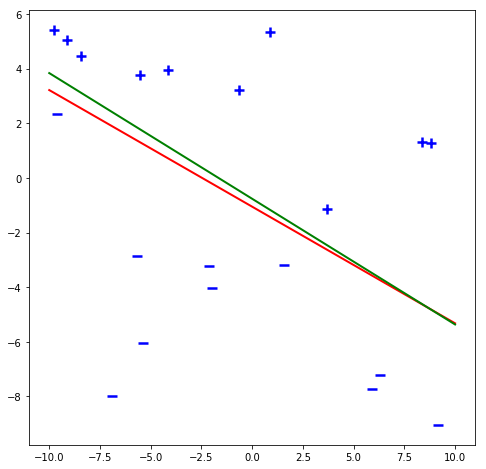

In [30]:
plt.figure(figsize=(8,8))
plt.plot(x[0, :10], x[1, :10], 'b+', mew=2.5, markersize=10)
plt.plot(x[0, 10:], x[1, 10:], 'b_', mew=2.5, markersize=10)
# plt.plot([0,1], [-b/w[1], (-b-w[0])/w[1]])
# w[0]x1 + w[1]x2 + b = 0
plt.plot([-10,10], [(-b+10*w[0])/w[1], (-b-10*w[0])/w[1]], 'r', linewidth=2)
plt.plot([-10,10], [(-res['x'][2] + 10*res['x'][0])/res['x'][1], (-res['x'][2]-10*res['x'][0])/res['x'][1]], 'g', linewidth=2)
# plt.plot(1, )
plt.show()

In [19]:
for i in x:
    for j in i:
        print(j, end=' ')
    print(';', end='')

-5.53838116617 8.82021720492 -8.4401532122 -4.13025487796 8.35374015489 -9.13568540527 0.865380877426 3.70048905445 -0.640077052401 -9.7704213248 6.32284652578 1.5601349115 -5.35569025062 -5.69142043437 -9.63200106739 9.15457199623 5.90625360199 -2.12265355034 -6.93108627857 -1.99154001857 ;3.77452323643 1.2736276047 4.4528102225 3.93221428417 1.32892657438 5.0488983392 5.34380851429 -1.13298075973 3.2211866953 5.4258889325 -7.20716792503 -3.18651455912 -6.0271249283 -2.87185165876 2.3358053919 -9.0448379779 -7.74308955596 -3.21629193764 -7.98851970778 -4.02120738073 ;

In [29]:
for i in b:
    print(-i, end=' ')

-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 

In [27]:
for i in A:
    for j in i:
        print(j, end=' ')
    print(';', end='')

5.53838116617 -8.82021720492 8.4401532122 4.13025487796 -8.35374015489 9.13568540527 -0.865380877426 -3.70048905445 0.640077052401 9.7704213248 6.32284652578 1.5601349115 -5.35569025062 -5.69142043437 -9.63200106739 9.15457199623 5.90625360199 -2.12265355034 -6.93108627857 -1.99154001857 ;-3.77452323643 -1.2736276047 -4.4528102225 -3.93221428417 -1.32892657438 -5.0488983392 -5.34380851429 1.13298075973 -3.2211866953 -5.4258889325 -7.20716792503 -3.18651455912 -6.0271249283 -2.87185165876 2.3358053919 -9.0448379779 -7.74308955596 -3.21629193764 -7.98851970778 -4.02120738073 ;-1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ;

In [28]:
b

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])